In [1]:
# 1. Multinomial logistic regression and cross validation
# (a)
import pandas as pd
df = pd.read_csv('./data/strongdrink.txt')
df['const'] = 1

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

X = df[['const', 'alco', 'malic', 'tot_phen', 'color_int']]
y = df['cultivar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
LogReg = LogisticRegression(multi_class= 'multinomial', solver = 'newton-cg')
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

print('For j = 1, the estimated coefficients are :', LogReg.coef_[0])
print('For j = 2, the estimated coefficients are :', LogReg.coef_[1])
print('')

print(classification_report(y_test, y_pred))
print('For j = 1, the error rate is 0.13.')
print('For j = 2 and j = 3, the error rate is 0.00.')
print('')

print('The number of different categories:')
print(df['cultivar'].value_counts())

For j = 1, the estimated coefficients are : [-8.45998055e-06  1.70038994e+00 -2.65604001e-01  1.22389318e+00
  2.27585993e-02]
For j = 2, the estimated coefficients are : [-1.76923786e-05 -1.46805313e+00 -3.33053748e-01  6.64013944e-01
 -9.22712974e-01]

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

For j = 1, the error rate is 0.13.
For j = 2 and j = 3, the error rate is 0.00.

The number of different categories:
2    71
1    59
3    46
Name: cultivar, dtype: int64


The second and third category of cultivar are the model best at predicting. However, category(2) is the one with the most observations(71), and category(3) is the one with the least observations(46). Therefore, the most accurately predicted category is not the one with the most observations.

In [13]:
# (b)
import numpy as np
from sklearn.model_selection import LeaveOneOut

Xvars = df.ix[:, (1, 2, 6, 10)].values
yvals = df.ix[:, 0].values

N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)

MSE_vec = np.zeros(N_loo)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    
    LogReg = LogisticRegression(multi_class= 'multinomial', solver = 'newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    MSE_vec[test_index] = (y_test - y_pred) ** 2
    y_test_vec[test_index] = y_test
    y_pred_vec[test_index] = y_pred
    
print(classification_report(y_test_vec, y_pred_vec))
print('For j = 1, the error rate is 0.10.')
print('For j = 2, the error rate is 0.09.')
print('For j = 3, the error rate is 0.04.')
print('')

MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv =', MSE_loo, ', test estimate MSE standard err =', MSE_loo_std)

             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176

For j = 1, the error rate is 0.10.
For j = 2, the error rate is 0.09.
For j = 3, the error rate is 0.04.

test estimate MSE loocv = 0.09659090909090909 , test estimate MSE standard err = 0.39426250589387657


Although the error rate of category 1 is lowerer, the error rates of category 2 and 3 are much higher compared to error rates in part (a).

In [21]:
# (c)
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits = k, random_state = 10, shuffle = True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
y_test_kf = np.zeros(Xvars.shape[0])
y_pred_kf = np.zeros(Xvars.shape[0])

k_ind = int(0)

for train_index, test_index in kf.split(Xvars):
    
    print('k index =', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    
    LogReg = LogisticRegression(multi_class= 'multinomial', solver = 'newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    print('')
    
    y_test_kf[test_index] = y_test
    y_pred_kf[test_index] = y_pred

    k_ind += 1

print(classification_report(y_test_kf, y_pred_kf))
print('For j = 1, the error rate is 0.13.')
print('For j = 2, the error rate is 0.09.')
print('For j = 3, the error rate is 0.04.')
print('')

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold =', MSE_kf, ', test estimate MSE standard err =', MSE_kf_std)

k index = 0
MSE for test set 0  is 0.22727272727272727

k index = 1
MSE for test set 1  is 0.11363636363636363

k index = 2
MSE for test set 2  is 0.045454545454545456

k index = 3
MSE for test set 3  is 0.045454545454545456

             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176

For j = 1, the error rate is 0.13.
For j = 2, the error rate is 0.09.
For j = 3, the error rate is 0.04.

test estimate MSE k-fold = 0.10795454545454546 , test estimate MSE standard err = 0.07429941381035239


Compared with part(b), the error rates for each category are slightly higher. But when compared with part(a), the error rates for category 2 and 3 are much higher.

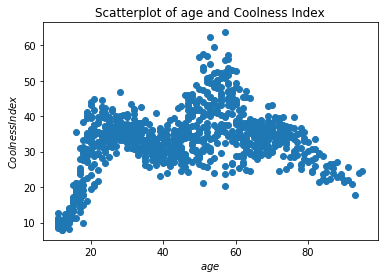

In [43]:
# 2. Splines and interpolation
# (a)
df = pd.read_csv('./data/CoolIndex.txt', header = None)
df.columns = ['age', 'index']
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter( x = df['age'], y = df['index'])
plt.xlabel('$age$')
plt.ylabel('$Coolness Index$')
plt.title('Scatterplot of age and Coolness Index')
plt.show()

In [44]:
# (b)
index = df['index']
age = df['age']
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1 = age_bin1, age_bin2 = age_bin2,
                           age_bin3 = age_bin3, age_bin4 = age_bin4,
                           age_bin5 = age_bin5))
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.285565,0.217573,0.057531
std,0.368767,0.447326,0.451919,0.412812,0.232977
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
import statsmodels.api as sm
from pandas.core import datetools

reg = sm.OLS(endog = index, exog = X_step, missing = 'drop')
reg_results = reg.fit()
print(reg_results.summary())
print('The estimated step function values for each bin is:')
print(reg_results.params)

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Sun, 18 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:56:42   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.566     35.522      0.0

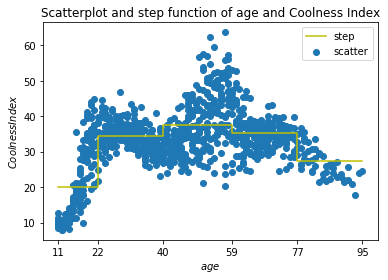

In [46]:
x = [11, 22, 40, 59, 77, 95]
y = reg_results.params
y = pd.concat([pd.Series([20]), y])

plt.scatter(age, index, label = 'scatter')
plt.step(x, y, color = 'y', label = 'step')
plt.legend()
plt.xlabel('$age$')
plt.ylabel('$Coolness Index$')
plt.title('Scatterplot and step function of age and Coolness Index')
plt.xticks(x)
plt.show()

In [14]:
print('The predicted coolness of a 73-year old from the stepwise function is', reg_results.predict([(0, 0, 0, 1, 0)])[0])

The predicted coolness of a 73-year old from the stepwise function is 35.22540004024275


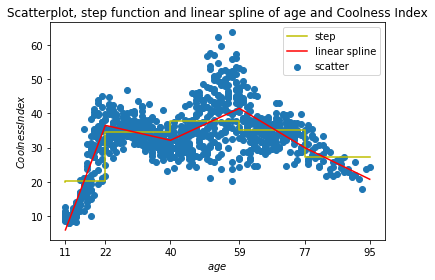

In [48]:
# (c)
from scipy.interpolate import LSQUnivariateSpline

# to ensure that x is strictly increasing
for i in range(age.shape[0]):
    age[i] = age[i] + 1e-10 * i
    
knots = [22, 40, 59, 77]

spl_index = LSQUnivariateSpline(age.values, index.values, knots, k = 1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

plt.scatter(age, index, label = 'scatter')
plt.step(x, y, color = 'y', label = 'step')
plt.plot(age_vec, spl_index(age_vec), 'r-', label = 'linear spline')
plt.legend()
plt.xlabel('$age$')
plt.ylabel('$Coolness Index$')
plt.title('Scatterplot, step function and linear spline of age and Coolness Index')
plt.xticks(x)

plt.show()

In [49]:
ages_for_predict = np.array([73])
predicted_index = spl_index(ages_for_predict)
print('Ages = ', ages_for_predict)
print('Predicted coolness of a 73-year old from the linear spline =', predicted_index)

Ages =  [73]
Predicted coolness of a 73-year old from the linear spline = [32.53683243]


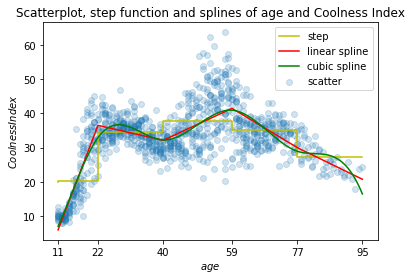

In [50]:
# (d)
spl_index_cubic = LSQUnivariateSpline(age.values, index.values, knots, k = 3)

plt.scatter(age, index, label = 'scatter', alpha = 0.2)
plt.step(x, y, color = 'y', label = 'step')
plt.plot(age_vec, spl_index(age_vec), 'r-', label = 'linear spline')
plt.plot(age_vec, spl_index_cubic(age_vec), 'g-', label = 'cubic spline')
plt.legend()
plt.xlabel('$age$')
plt.ylabel('$Coolness Index$')
plt.title('Scatterplot, step function and splines of age and Coolness Index')
plt.xticks(x)

plt.show()

In [51]:
predicted_index_cubic = spl_index_cubic(ages_for_predict)
print('Ages = ', ages_for_predict)
print('Predicted coolness of a 73-year old from the cubic spline =', predicted_index_cubic)

Ages =  [73]
Predicted coolness of a 73-year old from the cubic spline = [31.26242945]
